## Table Of Contents

1. Introduction
1. Project Overview
1. Dataset Overview
1. Exploratory Data Analysis

## 1.Introduction

Melanoma is a dangerous skin cancer. The skin which is our body’s largest organ stores water and fat and produces vitamin D. The skin made up of 3 main layers namely: Epidermis- the outer layer, Dermis: the inner layer, Hypodermis: the deep layer of fat. The deepest layer of the epidermis just above dermis contains cells called melanocytes which produces pigment melanin which is responsible for skin color. Melanoma begins in melanocytes. Melanoma forms when the healthy melanocytes change and grow out of control forming a cancerous tumor.

### *Skin Cancer in 2020 and beyond*

In 2018 global data statistics shows us that the number of diagnosed melanoma skin cancer were 287,723 and non-melanoma skin cancer cases were 1,042,056. 60,712 people died of melanoma skin cancer and 65,155 of non-melanoma skin cancer.
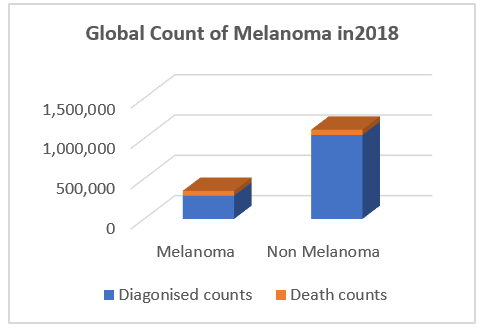
Source:https://www.melanomauk.org.uk/Handlers/Download.ashx?IDMF=91e70826-91d1-4b5e-9b0c-3dd3da10686d

The rate of increase of melanoma skin cancer was 44% between 2008 and 2018 with deaths increasing by 32%.  
The research by the Global Cancer Observatory for the world Health Organization says that by 2025, the number of cases of melanoma skin cancer diagnosed worldwide will rise 18% to 340,271 with the number of deaths increasing 20% to 72,886. By 2040, the figures are staggering. Nearly half a million (466,914) people will be diagnosed with melanoma skin cancer, an increase of 62% on 2018 figures, while 105,904 will die from the disease, an increase of 74%. 


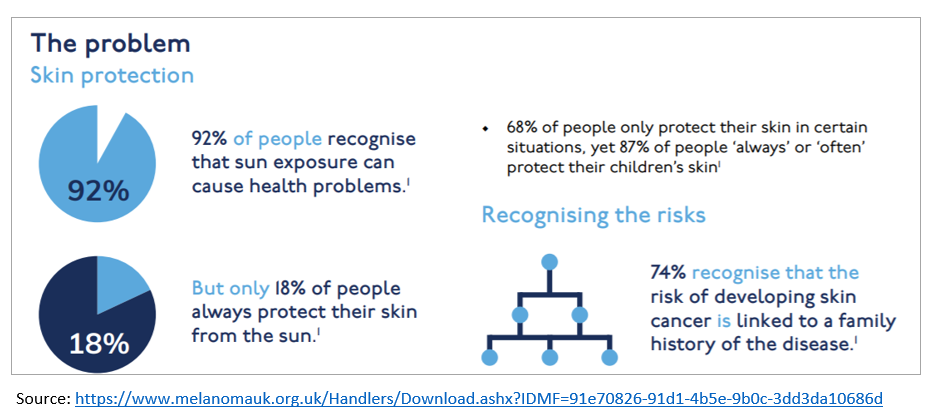

### *The solution*

The simple solution is to increase the awareness of the fact that any UV exposer can be harmful. Skin self-examinations should be carried out every month.

***Reminder***

***Protect yourself if you see the sun. Time for monthly check up if you see the full moon.***

## 2. Project Overview

### ***Aim of this project:***

The main aim of this project is to identify melanoma in images of skin lesions. The images of within the same patient will be used to determine the likelihood of identifying melanoma with the help of building a predictive binary classification model. The model will predict whether the lesion in the image is benign or malignant denotated by values 0 and 1 respectively. The binary classification model of Image analysis tool will be useful to automate the diagnosis of melanoma which will improve dermatologists' diagnostic accuracy. A model with higher and better accuracy to detect melanoma will have a positive impact on millions of people.

### ***Dataset Description:***

The dataset contains image data as well as metadata
* The images are provided in DICOM format which is commonly used in medical imaging data format.
* Images are also provided in JPEG and TFRecord format (TFRecord have been resized into uniform 1024x1024).
* Metadata is also provided in .csv format. In total three .csv files are provided: 
    *  	train.csv -the training set, 
    *  	test.csv-the test set
    *   sample_submission.csv- a sample submission file in the correct format


### ***Columns/Variables:***

1. image_name: unique identifier, points to filename of related DICOM image
1. patient_id: unique patient identifier
1. sex: the sex of the patient (when unknown, will be blank)
1. age_approx: approximate patient age at time of imaging
1. anatom_site_general_challenge: location of imaged site
1. diagnosis: detailed diagnosis information (train only)
1. benign_malignant: indicator of malignancy of imaged lesion
1. target: binarized version of the target variable

## 3. Dataset Overview

In [ ]:
#Import libraries
import os
from os import listdir
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
#Read the files available 
print(os.listdir("../input/siim-isic-melanoma-classification"))

In [ ]:
#map to image data path
image_path = "../input/siim-isic-melanoma-classification/"

#train data set path
df_train = pd.read_csv('../input/siim-isic-melanoma-classification/train.csv')

#test data set path
df_test =  pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')

In [ ]:
#print train data set shape
print('train data', df_train.shape)

#print test dataset shape
print('test data', df_test.shape)


We observed that we have 33126 observations in training data set and 10982 obsevations in test datset. 
There are 8 variables in train data set and 5 variables in test dataset.

In [ ]:
# test set percentage 
df_train.shape[0] / df_test.shape[0]


Let's get some information about the total counts of each variable and data types of each variables in train data set and test dataset.

In [ ]:
#Train data set info
df_train.info()

In [ ]:
#Test data set info
df_test.info()

The variables sex, age_approx, anatom_site_general_challenge in train set contain missing values. The variable anatom_site_general_challenge in test data set contain missing  values .

In [ ]:
# count of the total missing values of each variables in train data
df_train.isnull().sum()

The variable anatom_site_general_challenge has a large number of missing values.

In [ ]:
# count of the total missing values of each variables in test data
df_test.isnull().sum()

In test data set the variable anatom_site_general_challenge has huge number of missing values.

#### Lets see the 1st 5 rows of both Train and test data sets.

In [ ]:
#1st 5 observations in train data set 
df_train.head()

In [ ]:
#1st 5 observations in test data set 
df_test.head()

### 4. Exploratory Data Analysis

**Let's understand the benign_malignant variable.**

In [ ]:
# Variable benign_malignant counts in train set
df_train['benign_malignant'].value_counts()

In [ ]:
benign_malignant = df_train['benign_malignant'].value_counts()
labels = 'benign', 'malignant'
plt.pie (benign_malignant, labels=labels, autopct='%1.1f%%' )
plt.title('benign vs malignant')
plt.axis('equal')
plt.show()

In [ ]:
df_train.groupby("benign_malignant").target.value_counts()

The results shows that the target variable is highly imbalanced which could have an impact on the accuracy of the classification model.

### **An overview of the variable anatom_site_general_challenge.**

In [ ]:
# variable anatom_site_general_challenge in train data set
df_train['anatom_site_general_challenge'].value_counts()

In [ ]:
# variable anatom_site_general_challenge in test data set
df_test['anatom_site_general_challenge'].value_counts()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

sns.countplot(df_train['anatom_site_general_challenge'].sort_values(ascending=False), ax=ax[0], palette="Greens_r")
ax[0].set_xlabel("")
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_title("Location of imaged site in Train set");

sns.countplot(df_test['anatom_site_general_challenge'].sort_values(ascending=False), ax=ax[1], palette="Blues_r");
ax[1].set_xlabel("")
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_title("Location of imaged site in Test set");

It is observed that in both train set and test set the torso has highest counts followed by lower extremity, upper extrimity and head/neck. oral/ and genital has the lowest count. 

### The gender variable in details. 

In [ ]:
# count of male and female of variable sex in train data
df_train['sex'].value_counts()

In [ ]:
# count of male and female of variable sex in test data
df_test['sex'].value_counts()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(df_train['sex'], palette="Greens_r", ax=ax[0]);
ax[0].set_xlabel("")
ax[0].set_title("Train data set gender counts");

sns.countplot(df_test['sex'], palette="Blues_r", ax=ax[1]);
ax[1].set_xlabel("")
ax[1].set_title("Test data set gender counts");

Overall male and female classes in both train set and test set are acceptable. Not very highly imbalance. 

### The variable age_approx in train and test data sets.

In [ ]:
#variable age_approx in train set
df_train['age_approx'].value_counts()

In [ ]:
#variable age_approx in test set
df_test['age_approx'].value_counts()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(df_train['age_approx'], color="lightgreen", ax=ax[0]);
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_xlabel("");
ax[0].set_title("Age distribution in train set");

sns.countplot(df_test['age_approx'], color="blue", ax=ax[1]);
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_xlabel("");
ax[1].set_title("Age distribution in test set");

The age group 45 is found to be with highest number of frequency in both train and test data sets. The age group 10 and less than 10 and also 90 years are found to be less frquent. 

#### Let's analyse the frequency of male and female with respect with age group. 

In [ ]:
# Male and female frequency per age group in train set
df_train.groupby("age_approx").sex.value_counts()

In [ ]:
# Male and female frequency per age group in test set
df_test.groupby("age_approx").sex.value_counts()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(24,7))
sns.countplot(df_train['age_approx'], hue=df_train['sex'], ax=ax[0], palette="Greens_r");
sns.countplot(df_test['age_approx'], hue=df_test['sex'], ax=ax[1], palette="Blues_r");

The age distribution in train set is almost normally distributed, however there are multiple modes in test datasets.
Age group 45 is the peak in both train and test set.
In test set age 55 and 70 are found to have mode.

It is observed that male are more in count in most of the age group. However, in train set age group 25 to 40 female is found to be more frequent. Age group 55 in train set has more female count and age group 50 in test set has more female counts.
Male patients with age group higher than 70 are found to be more in both train and test sets.

### The frequency of variable diagnosis.

In [ ]:
# diagnosis type in train set
df_train['diagnosis'].value_counts()

In [ ]:
# Total percentage of unknown diagnosis
27124/33126*100

It is observed that in train set 81% observations have unknown diagnosis. The variable diagnosis counts are imbalanced.